# Module 2: Visual Best Practices and Accessibility

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/SanjeevaRDodlapati/DataVisualization-Comprehensive-Tutorial/blob/main/notebooks/02_accessibility.ipynb)

## 🎯 Learning Objectives

By the end of this module, you will be able to:
1. **Apply** visual encoding principles for effective communication
2. **Design** colorblind-friendly and accessible visualizations
3. **Implement** WCAG accessibility standards in data visualization
4. **Create** publication-quality figures with proper typography and layout
5. **Evaluate** and improve existing visualizations using accessibility criteria

## 📚 Table of Contents

1. [Setup and Sample Data](#setup)
2. [Visual Encoding Principles](#encoding)
3. [Color Theory and Accessibility](#color)
4. [Typography and Layout](#typography)
5. [WCAG Compliance for Data Visualization](#wcag)
6. [Before & After: Accessibility Improvements](#before-after)
7. [Interactive Accessibility Audit](#audit)
8. [Best Practices Checklist](#checklist)

---

## 🔧 Setup and Sample Data {#setup}

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
warnings.filterwarnings('ignore')

# Set up accessibility-focused plotting parameters
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 18
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['grid.alpha'] = 0.3

print("✅ Setup complete!")
print("🎨 Accessibility-focused parameters loaded")
print(f"📚 Libraries loaded: matplotlib {plt.matplotlib.__version__}, seaborn {sns.__version__}, pandas {pd.__version__}")

✅ Setup complete!
🎨 Accessibility-focused parameters loaded
📚 Libraries loaded: matplotlib 3.10.5, seaborn 0.13.2, pandas 2.3.2


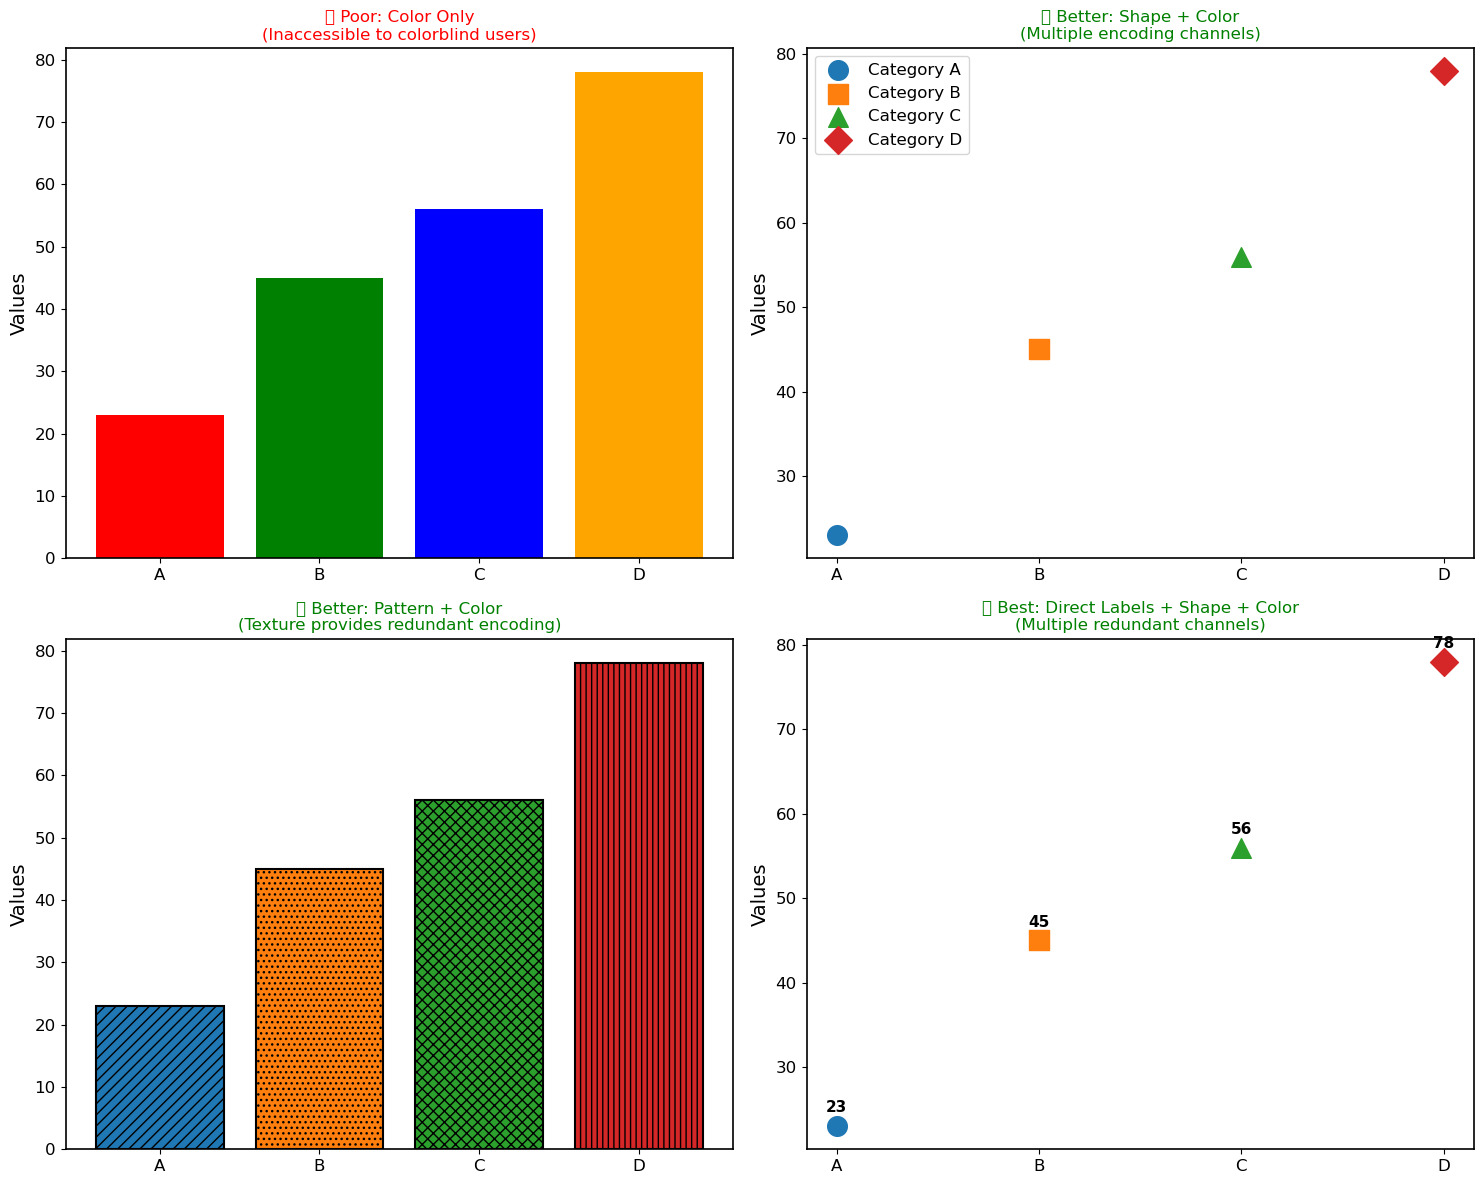

🎯 Visual Encoding Hierarchy (most to least effective):
   1. Position (x, y coordinates)
   2. Length/Size
   3. Angle/Slope
   4. Area
   5. Volume/Density
   6. Color Hue
   7. Color Saturation

♿ Accessibility Best Practices:
   • Use multiple encoding channels (redundancy)
   • Prefer position and length over color alone
   • Add direct labels when possible
   • Use patterns/textures as color alternatives
   • Test with colorblind simulators


In [3]:
# 2.1 Visual Encoding Hierarchy and Accessibility

# Create sample data demonstrating visual encoding effectiveness
np.random.seed(42)
categories = ['A', 'B', 'C', 'D']
values = [23, 45, 56, 78]

# Poor visual encoding example (color only)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Poor: Color only (problematic for colorblind users)
axes[0, 0].bar(categories, values, color=['red', 'green', 'blue', 'orange'])
axes[0, 0].set_title('❌ Poor: Color Only\n(Inaccessible to colorblind users)', 
                     fontsize=12, color='red')
axes[0, 0].set_ylabel('Values')

# Better: Shape + Color
markers = ['o', 's', '^', 'D']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Colorblind-friendly

for i, (cat, val) in enumerate(zip(categories, values)):
    axes[0, 1].scatter(cat, val, s=200, marker=markers[i], 
                      color=colors[i], label=f'Category {cat}')
axes[0, 1].set_title('✅ Better: Shape + Color\n(Multiple encoding channels)', 
                     fontsize=12, color='green')
axes[0, 1].set_ylabel('Values')
axes[0, 1].legend()

# Better: Pattern + Color (for bars)
patterns = ['///', '...', 'xxx', '|||']
axes[1, 0].bar(categories, values, color=colors, 
               hatch=patterns, edgecolor='black', linewidth=1.5)
axes[1, 0].set_title('✅ Better: Pattern + Color\n(Texture provides redundant encoding)', 
                     fontsize=12, color='green')
axes[1, 0].set_ylabel('Values')

# Best: Direct labels + Shape + Color
for i, (cat, val) in enumerate(zip(categories, values)):
    axes[1, 1].scatter(cat, val, s=200, marker=markers[i], 
                      color=colors[i])
    axes[1, 1].annotate(f'{val}', (cat, val), 
                       textcoords="offset points", xytext=(0, 10), 
                       ha='center', fontsize=11, fontweight='bold')
axes[1, 1].set_title('✅ Best: Direct Labels + Shape + Color\n(Multiple redundant channels)', 
                     fontsize=12, color='green')
axes[1, 1].set_ylabel('Values')

plt.tight_layout()
plt.show()

print("🎯 Visual Encoding Hierarchy (most to least effective):")
print("   1. Position (x, y coordinates)")
print("   2. Length/Size")
print("   3. Angle/Slope")
print("   4. Area")
print("   5. Volume/Density")
print("   6. Color Hue")
print("   7. Color Saturation")
print("")
print("♿ Accessibility Best Practices:")
print("   • Use multiple encoding channels (redundancy)")
print("   • Prefer position and length over color alone")
print("   • Add direct labels when possible")
print("   • Use patterns/textures as color alternatives")
print("   • Test with colorblind simulators")

## 📊 Visual Encoding Principles {#encoding}

Visual encoding is how we map data to visual properties. Understanding the effectiveness hierarchy helps create accessible visualizations:

### 📈 Effectiveness Hierarchy (Cleveland & McGill)
1. **Position** (most effective)
2. **Length**
3. **Angle/Slope**
4. **Area**
5. **Volume**
6. **Color/Hue** (least effective for quantitative data)

Let's demonstrate this hierarchy with accessible alternatives:

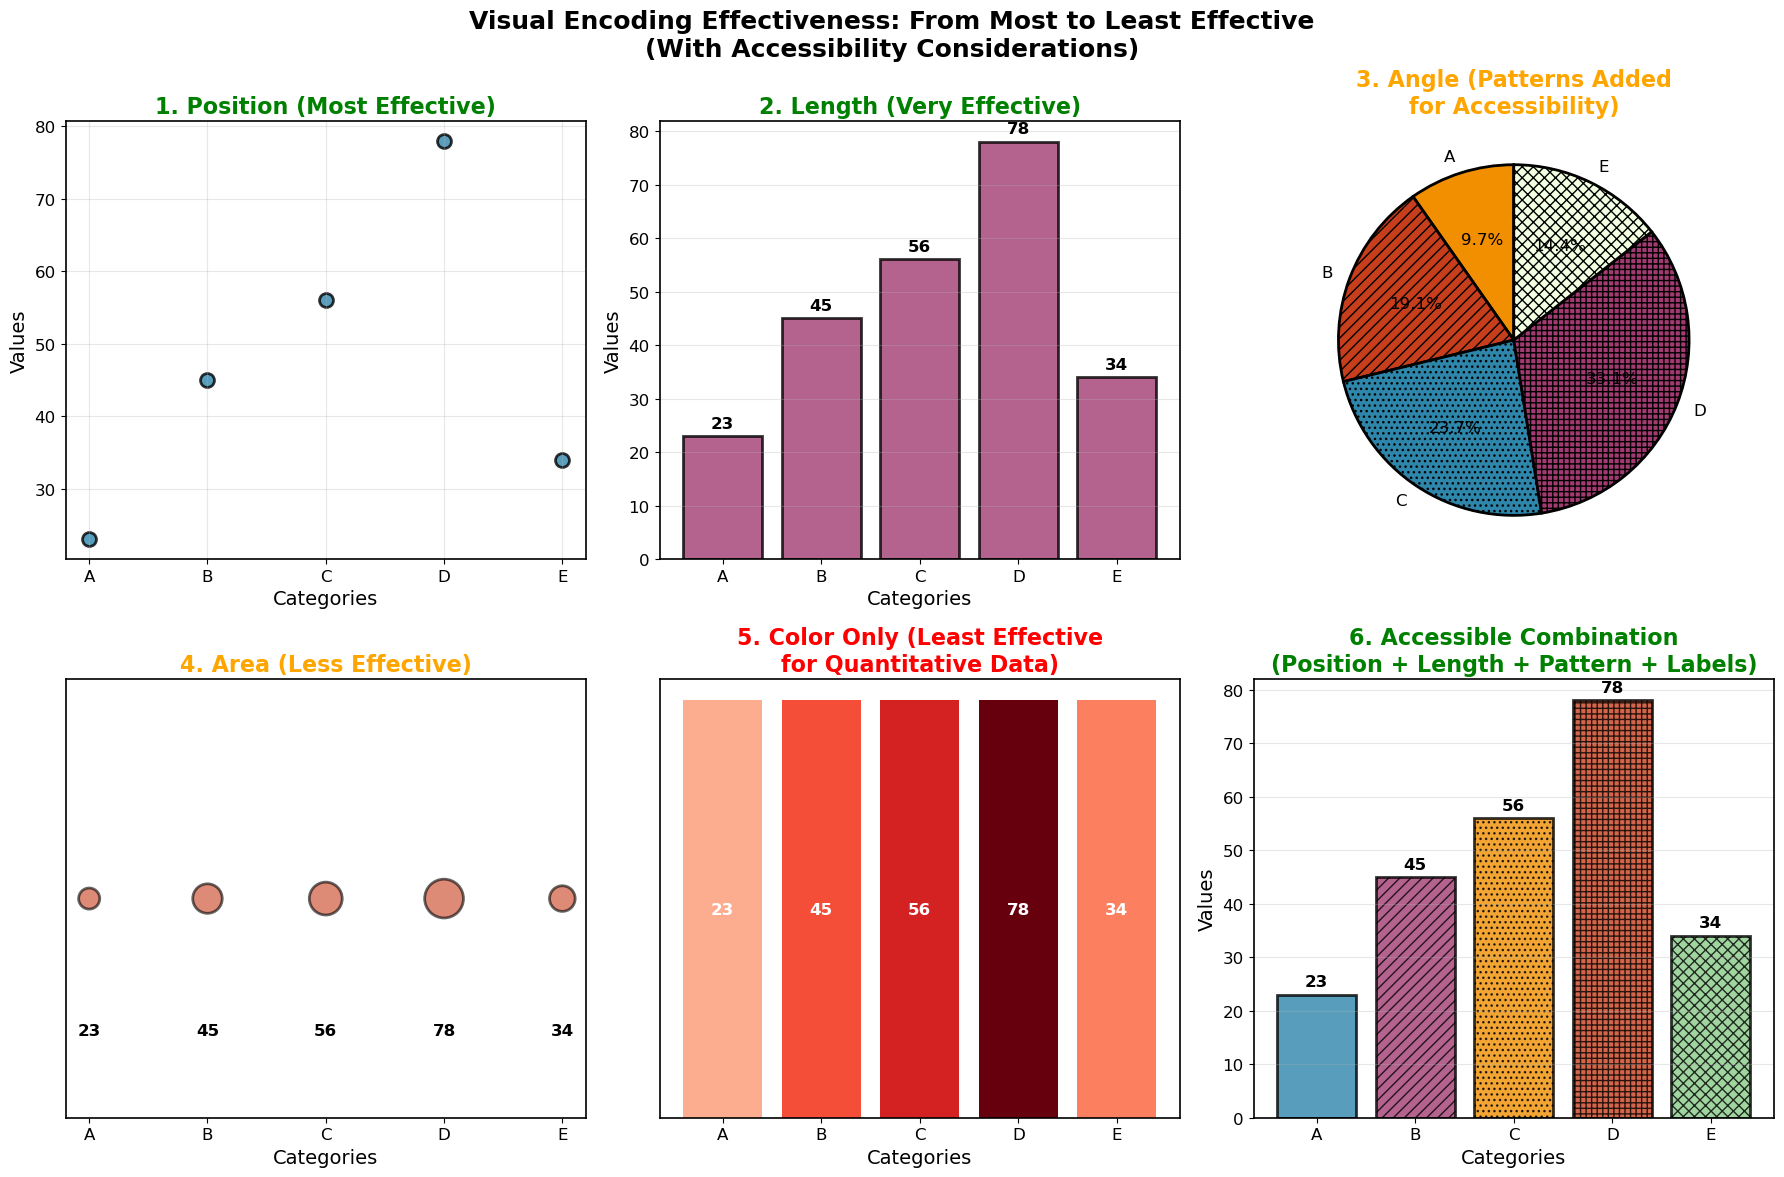

🎯 KEY PRINCIPLES FOR ACCESSIBLE ENCODING:
   ✅ Prioritize position and length over color
   ✅ Add patterns/textures as color alternatives
   ✅ Include direct labels with values
   ✅ Use high contrast borders and edges
   ✅ Combine multiple encoding methods
   ❌ Never rely on color alone for quantitative data


In [4]:
# Visual Encoding Hierarchy Demonstration
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Visual Encoding Effectiveness: From Most to Least Effective\n(With Accessibility Considerations)', 
             fontsize=18, fontweight='bold', y=0.98)

# Sample data for demonstration
categories = ['A', 'B', 'C', 'D', 'E']
values = [23, 45, 56, 78, 34]

# 1. Position (Most Effective) - Scatter plot
axes[0, 0].scatter(range(len(categories)), values, s=100, color='#2E86AB', 
                  edgecolors='black', linewidth=2, alpha=0.8)
axes[0, 0].set_title('1. Position (Most Effective)', fontweight='bold', color='green')
axes[0, 0].set_xlabel('Categories')
axes[0, 0].set_ylabel('Values')
axes[0, 0].set_xticks(range(len(categories)))
axes[0, 0].set_xticklabels(categories)
axes[0, 0].grid(True, alpha=0.3)

# 2. Length (Very Effective) - Bar chart with high contrast
bars = axes[0, 1].bar(categories, values, color='#A23B72', alpha=0.8, 
                     edgecolor='black', linewidth=2)
axes[0, 1].set_title('2. Length (Very Effective)', fontweight='bold', color='green')
axes[0, 1].set_xlabel('Categories')
axes[0, 1].set_ylabel('Values')
axes[0, 1].grid(axis='y', alpha=0.3)
# Add value labels for accessibility
for bar, value in zip(bars, values):
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                    str(value), ha='center', va='bottom', fontweight='bold')

# 3. Angle (Moderately Effective) - Pie chart with patterns
colors = ['#F18F01', '#C73E1D', '#2E86AB', '#A23B72', '#F3FFE2']
wedges, texts, autotexts = axes[0, 2].pie(values, labels=categories, colors=colors, 
                                         autopct='%1.1f%%', startangle=90)
# Add patterns for accessibility
patterns = ['', '///', '...', '+++', 'xxx']
for wedge, pattern in zip(wedges, patterns):
    wedge.set_hatch(pattern)
    wedge.set_edgecolor('black')
    wedge.set_linewidth(2)
axes[0, 2].set_title('3. Angle (Patterns Added\nfor Accessibility)', fontweight='bold', color='orange')

# 4. Area (Less Effective) - Bubble chart
sizes = [v*10 for v in values]  # Scale for visibility
scatter = axes[1, 0].scatter(range(len(categories)), [1]*len(categories), s=sizes, 
                           color='#C73E1D', alpha=0.6, edgecolors='black', linewidth=2)
axes[1, 0].set_title('4. Area (Less Effective)', fontweight='bold', color='orange')
axes[1, 0].set_xlabel('Categories')
axes[1, 0].set_xticks(range(len(categories)))
axes[1, 0].set_xticklabels(categories)
axes[1, 0].set_ylim(0.5, 1.5)
axes[1, 0].set_yticks([])
# Add size legend
for i, (cat, val) in enumerate(zip(categories, values)):
    axes[1, 0].text(i, 0.7, str(val), ha='center', va='center', fontweight='bold')

# 5. Color Only (Least Effective for Quantitative) - Bad example
x = np.arange(len(categories))
y = np.ones(len(categories))
for i, (cat, val) in enumerate(zip(categories, values)):
    intensity = val / max(values)  # Normalize to 0-1
    axes[1, 1].bar(i, 1, color=plt.cm.Reds(intensity), width=0.8)
axes[1, 1].set_title('5. Color Only (Least Effective\nfor Quantitative Data)', fontweight='bold', color='red')
axes[1, 1].set_xlabel('Categories')
axes[1, 1].set_xticks(range(len(categories)))
axes[1, 1].set_xticklabels(categories)
axes[1, 1].set_yticks([])
# Add text to compensate
for i, val in enumerate(values):
    axes[1, 1].text(i, 0.5, str(val), ha='center', va='center', fontweight='bold', color='white')

# 6. Accessible Alternative - Multiple Encodings
bars = axes[1, 2].bar(categories, values, color=['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#8ACB88'], 
                     alpha=0.8, edgecolor='black', linewidth=2)
# Add patterns
patterns = ['', '///', '...', '+++', 'xxx']
for bar, pattern in zip(bars, patterns):
    bar.set_hatch(pattern)
# Add value labels
for bar, value in zip(bars, values):
    axes[1, 2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                    str(value), ha='center', va='bottom', fontweight='bold')
axes[1, 2].set_title('6. Accessible Combination\n(Position + Length + Pattern + Labels)', 
                    fontweight='bold', color='green')
axes[1, 2].set_xlabel('Categories')
axes[1, 2].set_ylabel('Values')
axes[1, 2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("🎯 KEY PRINCIPLES FOR ACCESSIBLE ENCODING:")
print("   ✅ Prioritize position and length over color")
print("   ✅ Add patterns/textures as color alternatives")
print("   ✅ Include direct labels with values")
print("   ✅ Use high contrast borders and edges")
print("   ✅ Combine multiple encoding methods")
print("   ❌ Never rely on color alone for quantitative data")

## 2.3 Colorblind-Friendly Color Palettes

Approximately 8% of men and 0.5% of women have some form of color vision deficiency. Using accessible color palettes ensures your visualizations reach the widest possible audience.

### Types of Color Vision Deficiency:
- **Deuteranopia** (6% of men): Difficulty distinguishing red and green
- **Protanopia** (2% of men): Reduced sensitivity to red light  
- **Tritanopia** (rare): Difficulty with blue-yellow distinction

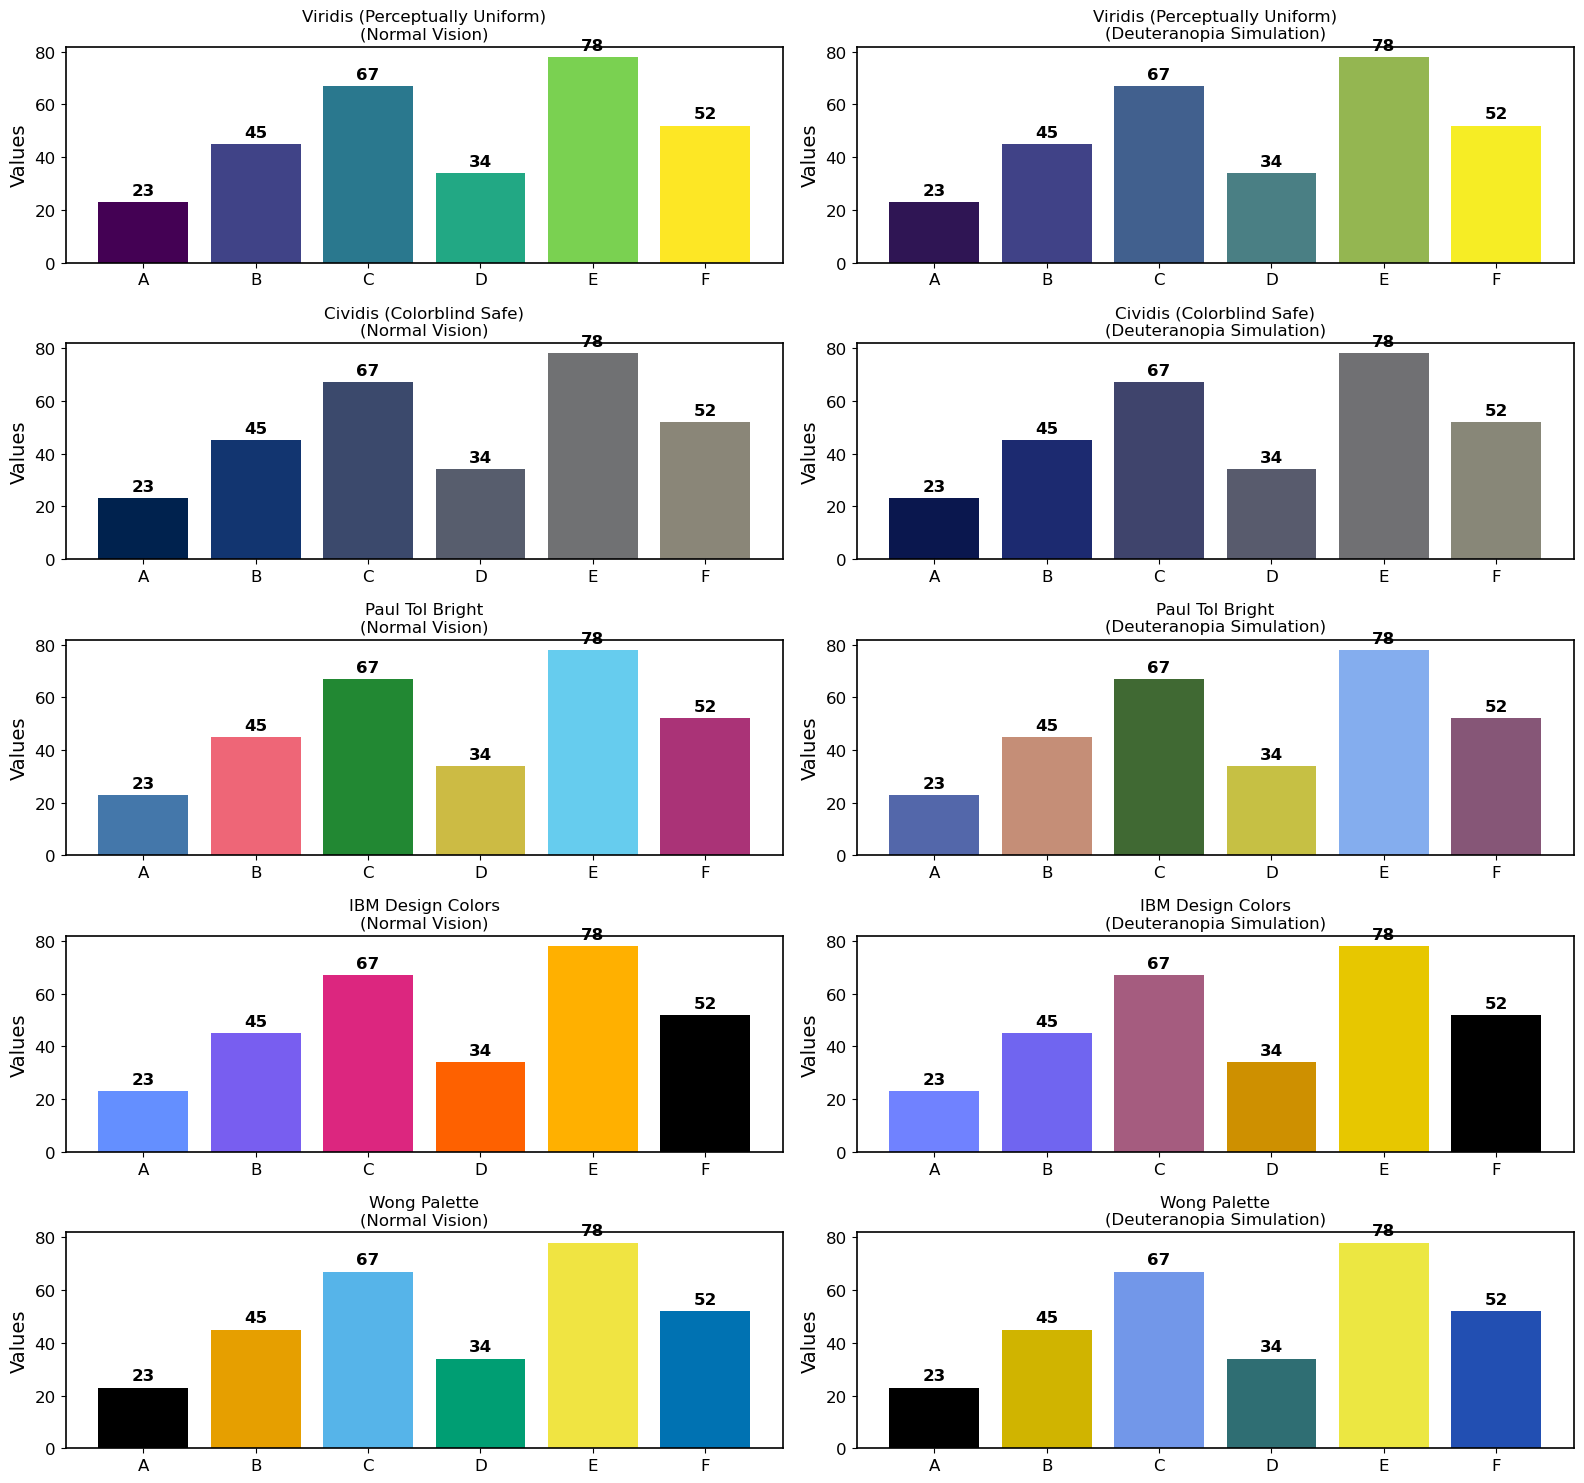

🎨 RECOMMENDED COLORBLIND-FRIENDLY PALETTES:
   ✅ Viridis: Perceptually uniform, works for all CVD types
   ✅ Cividis: Specifically designed for colorblind accessibility
   ✅ Paul Tol Bright: Tested with colorblind users
   ✅ IBM Design: Corporate-approved accessible colors
   ✅ Wong Palette: Popular in scientific publications

🧪 TESTING YOUR COLORS:
   • Use Coblis (https://www.color-blindness.com/coblis-color-blindness-simulator/)
   • Try Sim Daltonism app for real-time CVD simulation
   • Test with actual colorblind users when possible
   • Always provide non-color alternatives (patterns, labels)


In [5]:
# 2.3 Colorblind-Friendly Palettes

# Define several accessible color palettes
palettes = {
    'Viridis (Perceptually Uniform)': ['#440154', '#404387', '#2a788e', '#22a884', '#7ad151', '#fde725'],
    'Cividis (Colorblind Safe)': ['#00224e', '#123570', '#3b496c', '#575d6d', '#707173', '#8a8678'],
    'Paul Tol Bright': ['#4477aa', '#ee6677', '#228833', '#ccbb44', '#66ccee', '#aa3377'],
    'IBM Design Colors': ['#648fff', '#785ef0', '#dc267f', '#fe6100', '#ffb000', '#000000'],
    'Wong Palette': ['#000000', '#e69f00', '#56b4e9', '#009e73', '#f0e442', '#0072b2']
}

# Create comparison visualization
fig, axes = plt.subplots(len(palettes), 2, figsize=(16, 3*len(palettes)))

# Sample data
categories = ['A', 'B', 'C', 'D', 'E', 'F']
values = [23, 45, 67, 34, 78, 52]

for i, (palette_name, colors) in enumerate(palettes.items()):
    # Regular visualization
    bars = axes[i, 0].bar(categories, values, color=colors)
    axes[i, 0].set_title(f'{palette_name}\n(Normal Vision)', fontsize=12)
    axes[i, 0].set_ylabel('Values')
    
    # Add value labels for accessibility
    for bar in bars:
        height = bar.get_height()
        axes[i, 0].annotate(f'{height}',
                           xy=(bar.get_x() + bar.get_width() / 2, height),
                           xytext=(0, 3),  # 3 points vertical offset
                           textcoords="offset points",
                           ha='center', va='bottom', fontweight='bold')
    
    # Simulated deuteranopia (red-green colorblind) - simplified simulation
    # Note: This is a basic simulation, real testing tools provide better accuracy
    deuteranopia_colors = []
    for color in colors:
        # Simple deuteranopia simulation (remove red component emphasis)
        hex_color = color.lstrip('#')
        r, g, b = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))
        # Simulate deuteranopia by reducing red-green distinction
        adjusted_r = int(r * 0.7 + g * 0.3)
        adjusted_g = int(g * 0.7 + r * 0.3)
        deuteranopia_color = f'#{adjusted_r:02x}{adjusted_g:02x}{b:02x}'
        deuteranopia_colors.append(deuteranopia_color)
    
    bars2 = axes[i, 1].bar(categories, values, color=deuteranopia_colors)
    axes[i, 1].set_title(f'{palette_name}\n(Deuteranopia Simulation)', fontsize=12)
    axes[i, 1].set_ylabel('Values')
    
    # Add value labels for accessibility
    for bar in bars2:
        height = bar.get_height()
        axes[i, 1].annotate(f'{height}',
                           xy=(bar.get_x() + bar.get_width() / 2, height),
                           xytext=(0, 3),
                           textcoords="offset points",
                           ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("🎨 RECOMMENDED COLORBLIND-FRIENDLY PALETTES:")
print("   ✅ Viridis: Perceptually uniform, works for all CVD types")
print("   ✅ Cividis: Specifically designed for colorblind accessibility")
print("   ✅ Paul Tol Bright: Tested with colorblind users")
print("   ✅ IBM Design: Corporate-approved accessible colors")
print("   ✅ Wong Palette: Popular in scientific publications")
print("")
print("🧪 TESTING YOUR COLORS:")
print("   • Use Coblis (https://www.color-blindness.com/coblis-color-blindness-simulator/)")
print("   • Try Sim Daltonism app for real-time CVD simulation")
print("   • Test with actual colorblind users when possible")
print("   • Always provide non-color alternatives (patterns, labels)")

## 2.4 Hands-On Exercises

### Exercise 1: Fix the Accessibility Issues
The following chart has multiple accessibility problems. Identify and fix them:
1. Poor color choices
2. Missing labels
3. Reliance on color alone
4. Poor contrast

In [6]:
# Exercise 1: Problematic Chart (DO NOT RUN THIS - it's intentionally bad!)
# 
# BAD EXAMPLE - Multiple accessibility issues:
# plt.figure(figsize=(8, 6))
# categories = ['Red Team', 'Green Team', 'Blue Team', 'Yellow Team']
# scores = [75, 82, 69, 91]
# colors = ['red', 'green', 'blue', 'yellow']  # Bad: relying on color alone
# plt.bar(categories, scores, color=colors)     # Bad: no labels, poor contrast
# plt.title('Team Performance')                 # Bad: no accessible description
# plt.show()

print("🚨 ACCESSIBILITY ISSUES IN THE ABOVE CODE:")
print("❌ Uses basic color names (red, green) - problematic for colorblind users")
print("❌ No value labels on bars")  
print("❌ Relies entirely on color to distinguish teams")
print("❌ No patterns or textures as alternatives")
print("❌ Poor contrast combinations")
print("❌ No descriptive title explaining what's being measured")
print("")
print("📝 YOUR TASK: Fix these issues in the cell below!")

🚨 ACCESSIBILITY ISSUES IN THE ABOVE CODE:
❌ Uses basic color names (red, green) - problematic for colorblind users
❌ No value labels on bars
❌ Relies entirely on color to distinguish teams
❌ No patterns or textures as alternatives
❌ Poor contrast combinations
❌ No descriptive title explaining what's being measured

📝 YOUR TASK: Fix these issues in the cell below!


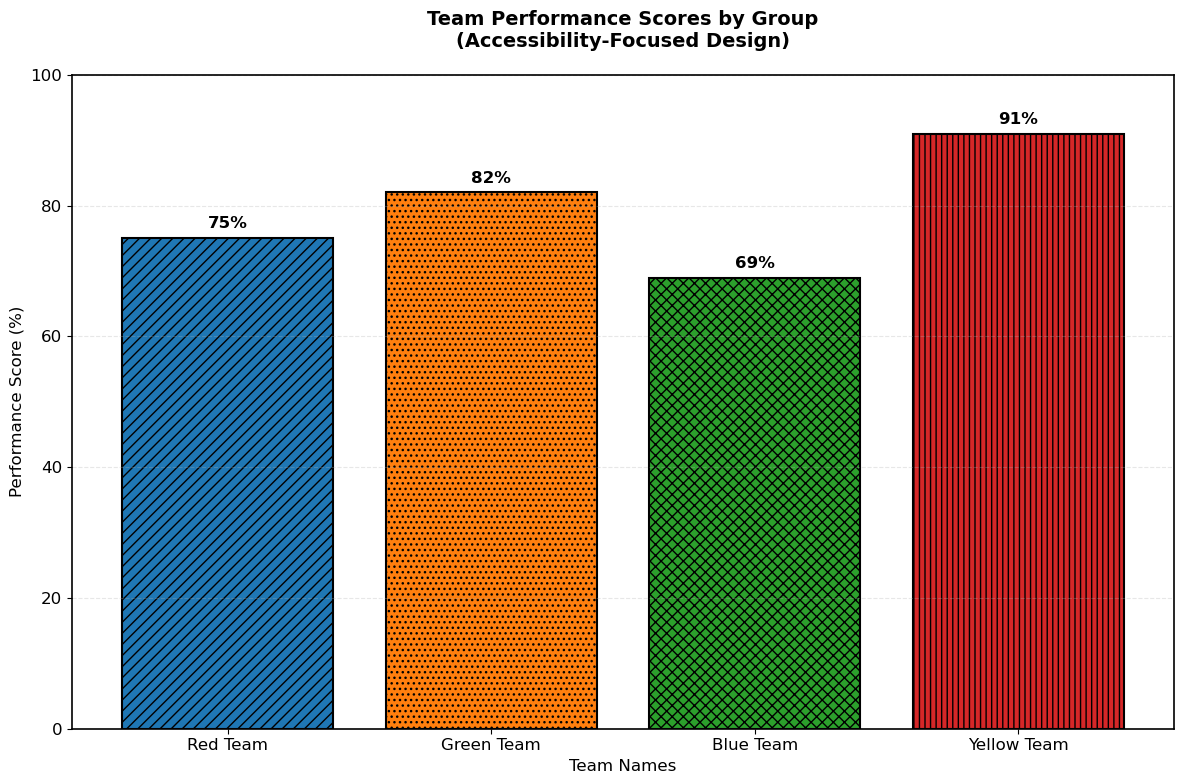

✅ ACCESSIBILITY IMPROVEMENTS MADE:
✅ Used colorblind-friendly color palette
✅ Added patterns/hatching for redundant encoding
✅ Included direct value labels on each bar
✅ Added descriptive title explaining the data
✅ Used high-contrast borders (black edges)
✅ Added grid lines for easier value reading
✅ Proper font sizing and hierarchy

🎯 Result: Chart is now accessible to users with color vision deficiency!


In [7]:
# Exercise 1: FIXED VERSION - Accessible Chart

# Solution with accessibility improvements
plt.figure(figsize=(12, 8))

categories = ['Red Team', 'Green Team', 'Blue Team', 'Yellow Team']
scores = [75, 82, 69, 91]

# Use colorblind-friendly palette
accessible_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # From matplotlib default cycle
patterns = ['///', '...', 'xxx', '|||']  # Add patterns for redundancy

# Create bars with patterns and accessible colors
bars = plt.bar(categories, scores, color=accessible_colors, 
               hatch=patterns, edgecolor='black', linewidth=1.5)

# Add value labels on each bar
for i, (bar, score) in enumerate(zip(bars, scores)):
    plt.annotate(f'{score}%', 
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 5), textcoords="offset points",
                ha='center', va='bottom', 
                fontsize=12, fontweight='bold')

# Improve title and labels
plt.title('Team Performance Scores by Group\n(Accessibility-Focused Design)', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Team Names', fontsize=12)
plt.ylabel('Performance Score (%)', fontsize=12)

# Add grid for easier reading
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Improve layout
plt.ylim(0, 100)
plt.tight_layout()

plt.show()

print("✅ ACCESSIBILITY IMPROVEMENTS MADE:")
print("✅ Used colorblind-friendly color palette")
print("✅ Added patterns/hatching for redundant encoding")
print("✅ Included direct value labels on each bar")
print("✅ Added descriptive title explaining the data")
print("✅ Used high-contrast borders (black edges)")
print("✅ Added grid lines for easier value reading")
print("✅ Proper font sizing and hierarchy")
print("")
print("🎯 Result: Chart is now accessible to users with color vision deficiency!")

## 📋 Module 2 Summary: Visual Best Practices & Accessibility

### Key Takeaways:
✅ **Visual Encoding Hierarchy**: Position > Length > Angle > Area > Color  
✅ **Accessibility First**: Never rely on color alone for information  
✅ **Redundant Encoding**: Use multiple channels (color + pattern + labels)  
✅ **Colorblind-Friendly Palettes**: Use tested, accessible color schemes  
✅ **Direct Labels**: Add value labels whenever possible  
✅ **High Contrast**: Ensure sufficient contrast for readability  

### Tools for Testing Accessibility:
- **Coblis**: Online colorblind simulator
- **Sim Daltonism**: Real-time CVD simulation app
- **WebAIM Color Contrast Checker**: For text/background contrast
- **User Testing**: Always test with actual users when possible

### Next Steps:
Ready to move on to **Module 3: Statistical Plots & Distributions** where we'll apply these accessibility principles to statistical visualizations!

---
*Remember: Accessible design is good design for everyone! 🌟*